### Project Outline
* Problem
* Motivation
* Datasets Information
* Feature Processing & Feature    Engineering
* Machine Learning Model Development
* Prediction/result
* Evaluaating the result/metrics
* Conclusion

### Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
# import matplotlib as plt
# import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection  import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor#
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn import metrics

In [ ]:
import os, types
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn import svm
%matplotlib inline
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
# from sklearn.feature_selection import SelecttkBest
from sklearn.feature_selection import chi2

In [ ]:
# Metrics

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Load datasets using pandas dataframe

In [ ]:
data= pd.read_csv("/content/heart_disease (1) (1) (1).csv")

### Exploratory Data Analysis (EDA)

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
data.shape

(918, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data['Age'].value_counts()

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

In [ ]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

No Missing values

### Data Cleaning

* Convert the column names to a better case and format
* Encode the dataset into numeric format using either LabelEncoder or Custom Function
       * Gender: Female(0), Male(1)
       * all: No(0),Yes(1)


In [ ]:
# Converting the column to lower case
data.columns.str.lower().str.replace(" "," ")

Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope',
       'heartdisease'],
      dtype='object')

In [ ]:
data.columns = data.columns.str.lower().str.replace(" "," ")

In [ ]:
data.columns

Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope',
       'heartdisease'],
      dtype='object')

In [ ]:
# Encoding the dataset
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
objList = data.select_dtypes(include="object").columns

In [ ]:
objList

Index(['sex', 'chestpaintype', 'restingecg', 'exerciseangina', 'st_slope'], dtype='object')

In [ ]:
columns_to_label_encode = [ 'chestpaintype', 'restingecg', 'exerciseangina', 'st_slope']

In [ ]:
LE = LabelEncoder()

In [ ]:
# Encode every column except age, sex and HeartDisease

for col in columns_to_label_encode:
    data[col] = LE.fit_transform(data[col].astype(str))

In [ ]:
data.dtypes

age                 int64
sex                object
chestpaintype       int64
restingbp           int64
cholesterol         int64
fastingbs           int64
restingecg          int64
maxhr               int64
exerciseangina      int64
oldpeak           float64
st_slope            int64
heartdisease        int64
dtype: object

In [ ]:
data.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,M,1,140,289,0,1,172,0,0.0,2,0
1,49,F,2,160,180,0,1,156,0,1.0,1,1
2,37,M,1,130,283,0,2,98,0,0.0,2,0
3,48,F,0,138,214,0,1,108,1,1.5,1,1
4,54,M,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
# List Initial Classes
print(LE.classes_)

['Down' 'Flat' 'Up']


In [ ]:
# Method 2 Using Custom Function for encoding sex and target column
sex_map = {"F":0, "M":1}
target_label_map = {"Negative":0, "Postive":1}

In [ ]:
data['sex'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
data['sex'] = data['sex'].map(sex_map)

In [ ]:
data['sex'].head()

0    1
1    0
2    1
3    0
4    1
Name: sex, dtype: int64

In [ ]:
# For Target Label
# Get Unique Values
data['heartdisease'].unique()

array([0, 1])

In [ ]:
data['heartdisease'].head()

0    0
1    1
2    0
3    1
4    0
Name: heartdisease, dtype: int64

In [ ]:
# Encode the target class  using a mapping dictionary
#data['heartdisease'] = data['heartdisease'].map(target_label_map)

In [ ]:
#heartdisease

In [ ]:
# Rechecking Datatypes to ensure all are converted to interger and float

data.dtypes

age                 int64
sex                 int64
chestpaintype       int64
restingbp           int64
cholesterol         int64
fastingbs           int64
restingecg          int64
maxhr               int64
exerciseangina      int64
oldpeak           float64
st_slope            int64
heartdisease        int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    int64  
 2   chestpaintype   918 non-null    int64  
 3   restingbp       918 non-null    int64  
 4   cholesterol     918 non-null    int64  
 5   fastingbs       918 non-null    int64  
 6   restingecg      918 non-null    int64  
 7   maxhr           918 non-null    int64  
 8   exerciseangina  918 non-null    int64  
 9   oldpeak         918 non-null    float64
 10  st_slope        918 non-null    int64  
 11  heartdisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
chestpaintype,918.0,0.781046,0.956519,0.0,0.00,0.0,2.0,3.0
restingbp,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
fastingbs,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
restingecg,918.0,0.989107,0.631671,0.0,1.00,1.0,1.0,2.0
maxhr,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
exerciseangina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


Narative

* From the descriptive summary, the minimum age is 28 while the maximum age is 77

* We would have to get the distribution of data per the age the age

In [ ]:
# Value Count per target
data['heartdisease'].value_counts()

1    508
0    410
Name: heartdisease, dtype: int64

<Figure size 720x360 with 0 Axes>

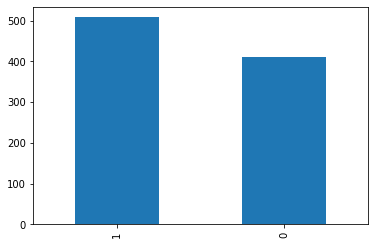

In [ ]:
# Plot of Distribution of Data per heartdisease/Label

plt.figure(figsize=(10,5))
plt.figure('plot of Distribution of Data per HeartDisease')
data['heartdisease'].value_counts().plot(kind='bar')
plt.show()

### Narative

* The dataset has
  * 508 has heartdisease -->1(Positive)
  * 410 has no heartdisease -->0(Negative)

* This look pretty good because it looks like a balance datasets from the plots


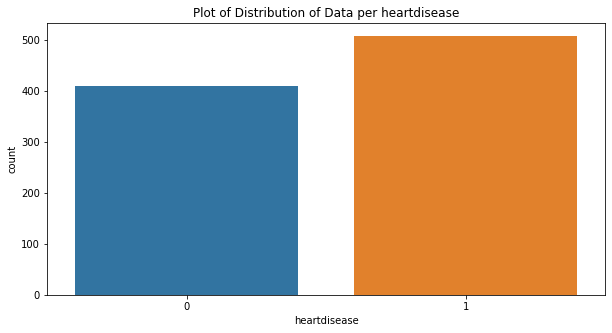

In [ ]:
# Plot of Distribution of Data per heartdisease/label

plt.figure(figsize=(10,5))
plt.title('Plot of Distribution of Data per heartdisease')
sns.countplot(data['heartdisease'])
plt.show()

In [ ]:
# Value count of gender

data['sex'].value_counts()

1    725
0    193
Name: sex, dtype: int64

### Narative

* Our dataset has
     * 725 datapoints for heartdisease-->1(male)
     * 193 datapoints for heartdisease -->0(female)

* There are more males than females

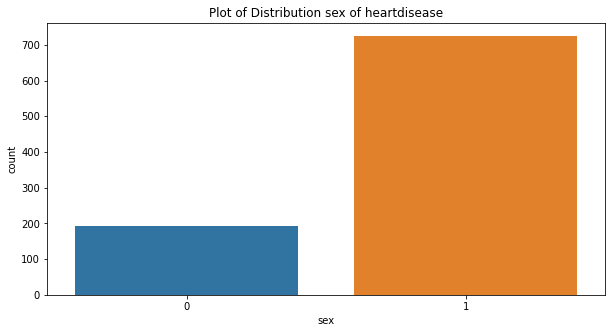

In [ ]:
# Plot of Distribution of Data per Sex

plt.figure(figsize=(10,5))
plt.title('Plot of Distribution sex of heartdisease')
sns.countplot(data['sex'])
plt.show()

##### From the above plot we can deduced that males patient are far more than female in that datasets

### Frequency Distribution Table using the Age Range


##### Find the minimum and max age

In [ ]:
print('Max',data['age'].max())
print('Min',data['age'].min())

Max 77
Min 28


In [ ]:
labels = ['Less than 10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80 and more']
bins= [0,10,20,30,40,50,60,70,80,90]

In [ ]:
freq_data = data.groupby(pd.cut(data['age'],bins=bins,labels=labels)).size()

In [ ]:
freq_data

age
Less than 10      0
10-20             0
20-30             5
30-40            88
40-50           223
50-60           381
60-70           197
70-80            24
80 and more       0
dtype: int64

In [ ]:
freq_data = freq_data.reset_index(name='count')

In [ ]:
freq_data.head()

,age,count
0,Less than 10,0
1,10-20,0
2,20-30,5
3,30-40,88
4,40-50,223


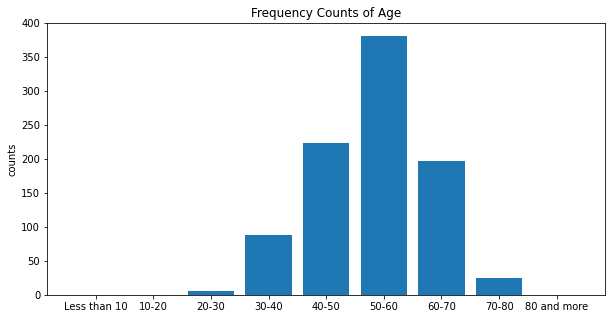

In [ ]:
# Plot of Distribution of Data per Sex

plt.figure(figsize=(10,5))
plt.bar(freq_data['age'],freq_data['count'])
plt.ylabel('counts')
plt.title('Frequency Counts of Age')
plt.show()

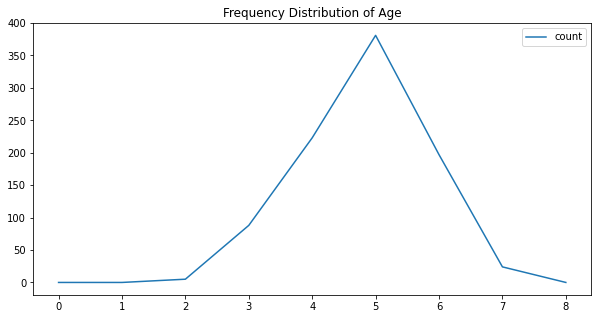

In [ ]:
# Plot of Distribution of Data per Sex
freq_data.plot(kind="line",figsize=(10,5))
plt.title("Frequency Distribution of Age")
plt.show()

### Narative

* Highest prevalence of Heartdisease is from 50-60 followed by 40-50 and 60-70

* The least is under 20 and elderly above 80

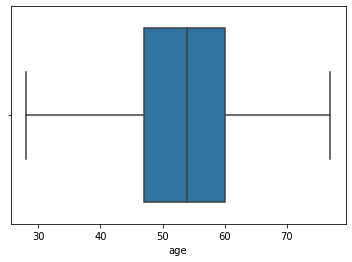

In [ ]:
# Find Outliers in Age using BoxPlot
sns.boxplot(data['age'])

### Correlation Analysis of Features in Relation to Targeted Class of Heartdisease

* I am exploring the dataset to see how each features relate with one another such has knowing the correlation between the features and the target class

In [ ]:
data.corr()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
chestpaintype,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
restingbp,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
fastingbs,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
restingecg,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
maxhr,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
exerciseangina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


### Plot Corelation with Heatmap

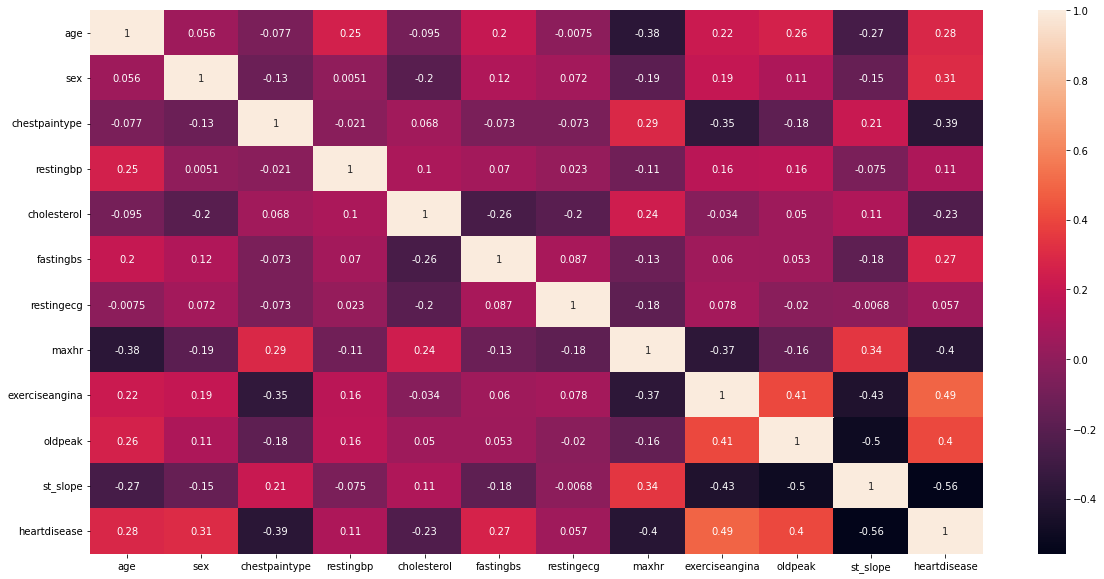

In [ ]:
# Checking the relationship between two features will affect my prediction

plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

### Checking for the highest correlation in the dataset

In [ ]:
corr_matrix = data.corr()

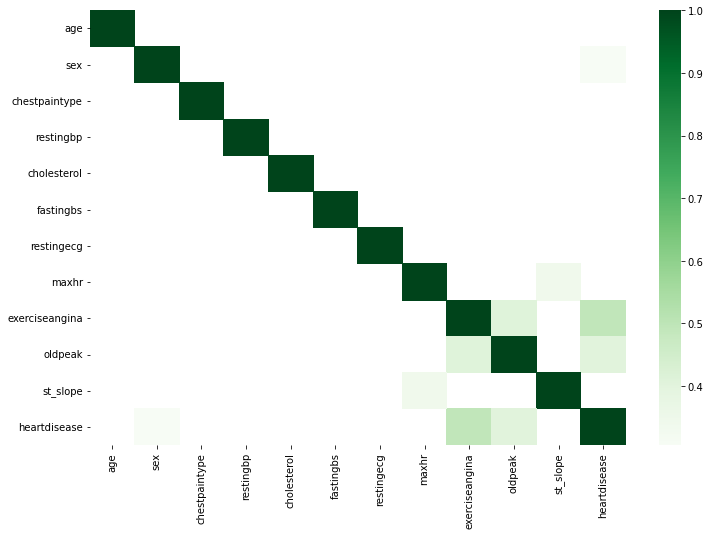

In [ ]:
highest_corr = corr_matrix[corr_matrix>=.3]
plt.figure(figsize=(12,8))
sns.heatmap(highest_corr, cmap='Greens')

##### List Features with highest Correlation coefficient

In [ ]:
s = corr_matrix.abs().unstack()
top_features_per_correlation = s. sort_values(kind='quicksort')

In [ ]:
print(top_features_per_correlation)

sex            restingbp        0.005133
restingbp      sex              0.005133
restingecg     st_slope         0.006778
st_slope       restingecg       0.006778
restingecg     age              0.007484
                                  ...   
restingbp      restingbp        1.000000
chestpaintype  chestpaintype    1.000000
sex            sex              1.000000
st_slope       st_slope         1.000000
heartdisease   heartdisease     1.000000
Length: 144, dtype: float64


### Feature Engineering

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import chi2

In [ ]:
data.columns

Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope',
       'heartdisease'],
      dtype='object')

In [ ]:
# Features and labels
# Which columns are for features and for labels

X = data[['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope']]

y = data['heartdisease']

In [ ]:
X

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [ ]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: heartdisease, Length: 918, dtype: int64

# Normalisation

In [ ]:
norm_x = (X-X.min())/ (X.max() - X.min())
norm_x

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope
0,0.244898,1.0,0.333333,0.70,0.479270,0.0,0.5,0.788732,0.0,0.295455,1.0
1,0.428571,0.0,0.666667,0.80,0.298507,0.0,0.5,0.676056,0.0,0.409091,0.5
2,0.183673,1.0,0.333333,0.65,0.469320,0.0,1.0,0.267606,0.0,0.295455,1.0
3,0.408163,0.0,0.000000,0.69,0.354892,0.0,0.5,0.338028,1.0,0.465909,0.5
4,0.530612,1.0,0.666667,0.75,0.323383,0.0,0.5,0.436620,0.0,0.295455,1.0
...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1.0,1.000000,0.55,0.437811,0.0,0.5,0.507042,0.0,0.431818,0.5
914,0.816327,1.0,0.000000,0.72,0.320066,1.0,0.5,0.570423,0.0,0.681818,0.5
915,0.591837,1.0,0.000000,0.65,0.217247,0.0,0.5,0.387324,1.0,0.431818,0.5
916,0.591837,0.0,0.333333,0.65,0.391376,0.0,0.0,0.802817,0.0,0.295455,0.5


In [ ]:
# from sklearn.feature_selection import SelecttkBest
from sklearn.feature_selection import SelectKBest,f_regression,chi2

skb = SelectKBest(f_regression,k=9)
best_features_fit = skb.fit_transform(norm_x,y)

In [ ]:
print(best_features_fit)

[[0.24489796 1.         0.33333333 ... 0.         0.29545455 1.        ]
 [0.42857143 0.         0.66666667 ... 0.         0.40909091 0.5       ]
 [0.18367347 1.         0.33333333 ... 0.         0.29545455 1.        ]
 ...
 [0.59183673 1.         0.         ... 1.         0.43181818 0.5       ]
 [0.59183673 0.         0.33333333 ... 0.         0.29545455 0.5       ]
 [0.20408163 1.         0.66666667 ... 0.         0.29545455 1.        ]]


In [ ]:
from sklearn.feature_selection import SelectKBest,f_regression,chi2

skb = SelectKBest(f_regression,k=9)
best_features_fit_2 = skb.fit_transform(norm_x,y)

In [ ]:
best_features_fit_2

array([[0.24489796, 1.        , 0.33333333, ..., 0.        , 0.29545455,
        1.        ],
       [0.42857143, 0.        , 0.66666667, ..., 0.        , 0.40909091,
        0.5       ],
       [0.18367347, 1.        , 0.33333333, ..., 0.        , 0.29545455,
        1.        ],
       ...,
       [0.59183673, 1.        , 0.        , ..., 1.        , 0.43181818,
        0.5       ],
       [0.59183673, 0.        , 0.33333333, ..., 0.        , 0.29545455,
        0.5       ],
       [0.20408163, 1.        , 0.66666667, ..., 0.        , 0.29545455,
        1.        ]])

#####  Using ExtraTreesClassifier To Select The Most Important Features

In [ ]:
et_clf = ExtraTreesClassifier()
et_clf.fit(X,y)

ExtraTreesClassifier()

In [ ]:
et_clf = ExtraTreesClassifier()
et_clf.fit(norm_x,y)

ExtraTreesClassifier()

In [ ]:
# Print Important features
print(et_clf.feature_importances_)

[0.07357306 0.05345639 0.10888311 0.07047037 0.0923145  0.04233209
 0.03827403 0.08088099 0.12974667 0.08681864 0.22325015]


In [ ]:
feature_importance_data = pd.Series(et_clf.feature_importances_,index=X.columns)

In [ ]:
feature_importance_data.head()

age              0.073573
sex              0.053456
chestpaintype    0.108883
restingbp        0.070470
cholesterol      0.092314
dtype: float64

In [ ]:
# feature_importance_data.nlargest(12).plot(kind='barh')

### Narative

##### I used ExtreTreeClassifier because it select most imortant features for me
#####  Features such as st_slope, exerciseangina, chectpaintype, cholesterol, oldpeak, maxhr and resingbp are the most important feature
##### Almost like the precious exept age, sex, fastingbs and resingecg was changed
##### However, since this is heartdisease detection we are using all the features and diverse scenario due to different life style and physiology of individuals

## Machine Learning Model Development

#### I would be building a supervised machine learning classification model using 4-algorithms namely
###### (1) LogisticsRegression:  This is useful for classification problem and it is very simple and very fast
###### (2) KNN
###### (3) Decision Tree Classifier
###### (4) Support Vector Machine (Support Vector Classifier)
###### (5) Random Forest Classifier

In [ ]:
# Features and Label
print(X.columns)

Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope'],
      dtype='object')


In [ ]:
# Split Dataset into 2
X_train,X_test,y_train,y_test = train_test_split(norm_x,y,test_size=0.3, random_state=1)

In [ ]:
# shape of Dataset
print('original data',data.shape)
print('training data',X_train.shape)
print('testing data',y_test.shape)

original data (918, 12)
training data (642, 11)
testing data (276,)


### Using LogisticRegression to build a Model

In [ ]:
# Using LogisticRegression to build a Model
cv_lr_model = LogisticRegression()
cv_lr_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Check for Model Accuracy
lr_pred = cv_lr_model.predict(X_test)
lr_model = accuracy_score(lr_pred,y_test)
lr_model

0.855072463768116

In [ ]:
print(classification_report(lr_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       119
           1       0.85      0.90      0.88       157

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.85       276
weighted avg       0.86      0.86      0.85       276



### Narative

###### Using the LogisticRegression ML  estimate our model had an accuracy score of 0.86956 (Approximately 87%).
###### We will have to evaluate our model with other metrics such as classification report  and confusion matrix

### Evaluation of Model

###### Using Classification Report
###### This function create a text report showing the main classification metrics such as precision , recall, f1-score
###### Precision: This refers to the ability of the classify not to label as positive a  sample that is negative
###### Recall: This refers to the ability of the classifier to find all positives samples.

### Using Confusion Matrix
###### ROC Curve
###### Precision recall curve


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve

In [ ]:
target_names = ['Negative(0)','Positive(1)']

In [ ]:
# Classification Report
print(classification_report(y_test,lr_pred,target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.79      0.86      0.82       109
 Positive(1)       0.90      0.85      0.88       167

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276



### Confusion Matrix


###### This will help us to know the true positive and the true negative

In [ ]:
# Confusion Matrix
confusion_matrix(y_test,lr_pred)

array([[ 94,  15],
       [ 25, 142]])

### ROC Curve
###### Receiver Operating characteristics (ROC)  curve is another common tool used for binary classifier.
###### It is similar to precision/recall curve, but instaed of plotting precision versus recall, the ROC plots the true positive rate agaisnt the force positive rate.
###### A perfect classifier we have a ROC AUC equal to 1, whereas a purely random  classfier wiil have a ROC AUC equal to 0.5. However, in our case we had almost perfect classifier with  an AUC of 0.91

In [ ]:
from sklearn.model_selection import cross_val_score

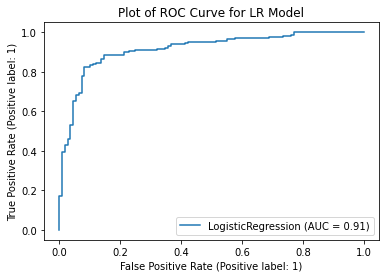

In [ ]:
plot_roc_curve(cv_lr_model, X_test, y_test)
plt.title('Plot of ROC Curve for LR Model')
plt.show()

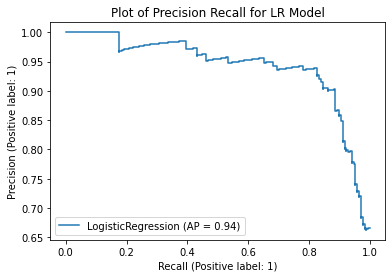

In [ ]:
disp = plot_precision_recall_curve(cv_lr_model, X_test, y_test)
plt.title('Plot of Precision Recall for LR Model')
plt.show()

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)

#build multiple linear regression model
model = LogisticRegression()

#use k-fold CV to evaluate model
model1 = cross_val_score(model, X, y, scoring='accuracy',
                         cv=cv)

In [ ]:
print(np.average(model1))
print(np.std(model1))

0.8442266571632218
0.02909551314442501


### Using Decision Tree Classifier Model

In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [ ]:
# Fit
cv_dt_model = DecisionTreeClassifier()

In [ ]:
# Check Model Accuracy
cv_dt_model=DecisionTreeClassifier()
cv_dt_model.fit(X_train,y_train)
dt_pred = cv_dt_model.predict(X_test)
dt_model = accuracy_score(dt_pred,y_test)

In [ ]:
dt_model

0.7355072463768116

In [ ]:
# Classification Report for Decision Tree Model
print(classification_report(y_test,dt_pred,target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.63      0.79      0.70       109
 Positive(1)       0.84      0.70      0.76       167

    accuracy                           0.74       276
   macro avg       0.73      0.74      0.73       276
weighted avg       0.76      0.74      0.74       276



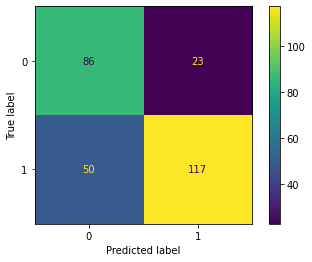

In [ ]:
# # Plot confusion Matrix
plot_confusion_matrix(cv_dt_model,X_test,y_test)

In [ ]:
from sklearn.svm import SVC

In [ ]:
cv_svc_model = SVC()
cv_svc_model.fit(X_train, y_train)

SVC()

In [ ]:
svc_pred = cv_svc_model.predict(X_test)

In [ ]:
svc_model = accuracy_score(svc_pred, y_test)
svc_model

0.8804347826086957

In [ ]:
cv_knn_model = KNeighborsClassifier()
cv_knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_pred = cv_knn_model.predict(X_test)

In [ ]:
knn_model = accuracy_score(knn_pred, y_test)
knn_model

0.8514492753623188

In [ ]:
cv_rfc_model = RandomForestClassifier(n_estimators=120, max_depth=4)
cv_rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=120)

In [ ]:
rfc_pred = cv_rfc_model.predict(X_test)

In [ ]:
rfc_model = accuracy_score(rfc_pred,y_test)
rfc_model

0.8876811594202898

In [ ]:
print(f'Logistic Regression Accuraccy_Score: {lr_model}')
print(f'Decision Tree Accuraccy_Score: {dt_model}')
print(f'KNN Accuraccy_Score: {knn_model}')
print(f'Support Vector Classifier Accuraccy_Score: {svc_model}')
print(f'Random Forest Classifier Accuraccy_Score: {rfc_model}')

Logistic Regression Accuraccy_Score: 0.855072463768116
Decision Tree Accuraccy_Score: 0.7355072463768116
KNN Accuraccy_Score: 0.8514492753623188
Support Vector Classifier Accuraccy_Score: 0.8804347826086957
Random Forest Classifier Accuraccy_Score: 0.8876811594202898


In [ ]:
model = ['lr_model','dt_model','svc_model','knn_model','rfc_model']

### Narative

##### The LogisticRegression classifier does better than the decision Trees Classifier

######   Now that we have created a decision tree, let’s see what it looks like when we visualise it

LR: 0.839543 (0.035720)
DCT: 0.767981 (0.045114)
KNN: 0.839736 (0.049639)
RFC: 0.850505 (0.020801)
SVM: 0.850505 (0.032672)


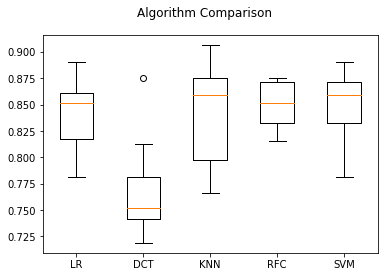

In [ ]:
from sklearn import model_selection
seed = 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('DCT', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RFC', RandomForestClassifier(n_estimators=120, max_depth=4)))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 3.2 MB/s 


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(cv_rfc_model)

In [ ]:
shap_values = explainer.shap_values(X_test)

In [ ]:
shap_values

[array([[-0.02042523, -0.01153279, -0.08068593, ...,  0.05905364,
         -0.09316914, -0.11525434],
        [-0.00238579, -0.01335607, -0.07810386, ..., -0.08461476,
         -0.06121529, -0.11685204],
        [ 0.0067462 , -0.01229393, -0.07247843, ..., -0.07631572,
         -0.08123866, -0.12358091],
        ...,
        [-0.01639871, -0.01171583,  0.09560356, ...,  0.04929255,
          0.03337988, -0.17633627],
        [ 0.00632097, -0.01349781, -0.07872777, ..., -0.08178268,
         -0.0475909 , -0.12891608],
        [-0.05451554, -0.010925  ,  0.1239174 , ..., -0.10855181,
          0.05634747,  0.17697225]]),
 array([[ 0.02042523,  0.01153279,  0.08068593, ..., -0.05905364,
          0.09316914,  0.11525434],
        [ 0.00238579,  0.01335607,  0.07810386, ...,  0.08461476,
          0.06121529,  0.11685204],
        [-0.0067462 ,  0.01229393,  0.07247843, ...,  0.07631572,
          0.08123866,  0.12358091],
        ...,
        [ 0.01639871,  0.01171583, -0.09560356, ..., -

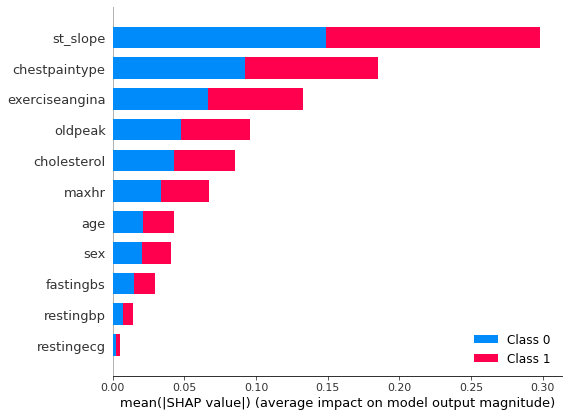

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=120, max_depth=4, criterion='entropy')

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[3]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot',
                feature_names = X_train.columns,
                class_names = y_train.name,
                rounded = True, proportion = False,
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')